## Lab3
Name: Yile Wang  
Netid: yxw190015

In [1]:
import networkx as nx
import numpy
import numpy.linalg as la
import matplotlib.pyplot as plt

This function prints the top five (or `num`) nodes according to the centrality vector `v`, where `v` takes the form: `v[nidx]` is the centrality of the node that is the `nidx`-th element of `G.nodes()`

In [7]:
def print_top_5(G,v, num=5):
    thenodes = list(G.nodes())
    idx_list = [(i,v[i]) for i in range(len(v))]
    idx_list = sorted(idx_list, key = lambda x: x[1], reverse=True)
    for i in range(min(num,len(idx_list))):
        nidx, score = idx_list[i]
        print('  %i. %s (%1.4f)' % (i+1,thenodes[nidx],score))
        #print '  %i. %s' % (i+1,G.node_object(idx))

This function returns the index of the maximum of the array. If two or more indices have the same max value, the first index is returned.

In [8]:
def index_of_max(v):
    return numpy.where(v == max(v))[0]

This function accepts a dictionary of nodes with centrality values and returns a centrality vector

In [9]:
def centrality_vector(G,d):
    thenodes = list(G.nodes())
    v = numpy.zeros((G.number_of_nodes(),))
    for i,u in enumerate(thenodes):
        v[i] = d[u]
    return v

This function provides the index of a node based on its order in `G.nodes()`

In [10]:
def node_index(G,n):
    thenodes = list(G.nodes())
    return thenodes.index(n)

Now we read in the edgelist file that contains the coappearance network we will analyze. We will look at two different networks, corresponding to only the *Lord of the Rings* series and the *Lord of the Rings* series plus the prequel, The *Hobbit*. The `unweighted` boolean, if set to `True` will set all the edge weights to one. Recall that setting all weights to 1 is different (in NetworkX) from having no weights assigned, which could be accomplished instead by: `G = nx.read_edgelist('LoTR_characters.edgelist',data=False)`.

In [11]:
unweighted = True
G = nx.read_weighted_edgelist('LotR_characters.edgelist') # just Lord of the Rings
#G = nx.read_weighted_edgelist('hobbit_LotR_characters.edgelist') # with the Hobbit
if unweighted:
    for u,v in G.edges():
        G[u][v]['weight'] = 1
A = numpy.array(nx.adjacency_matrix(G).todense().T)
N = G.number_of_nodes()

## Degree Centrality

## Eigenvector Centrality

In [12]:
print('Eigenvector Centrality (by NetworkX):')

Eigenvector Centrality (by NetworkX):


In [13]:
print('Eigenvector Centrality (by linear algebra):')
k, v = la.eig(A)
k1_idx = index_of_max(k) # find the index of the largest eigenvalue
# finish printing the top 5 eigenvector centrality characters by linear algebra

Eigenvector Centrality (by linear algebra):


In [14]:
noi = 'arwen'
noi_idx = node_index(G,noi)
print('Confirming that eigenvector centrality is a steady-state of sorts for node %s:' % noi)
# compare the eigenvector centrality of arwen to the sum of the centralities of its neighbors (divided by the largest eigenvalue)

Confirming that eigenvector centrality is a steady-state of sorts for node arwen:


The following section should run and produce a plot that you need to interpret.

Showing the convergece of eigenvector centrality...


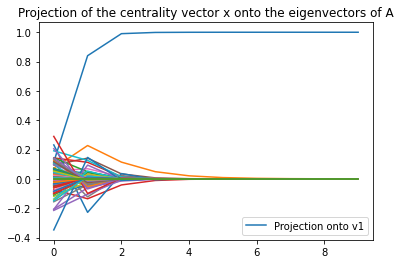

In [15]:
print('Showing the convergece of eigenvector centrality...')
num_steps = 10
x = numpy.zeros((N,1)) # initial centrality vector
x[76] = 1
cs = numpy.zeros((N,num_steps))
for i in range(num_steps):
    x = x/la.norm(x) # at each step we need to normalize the centrality vector
    for j in range(G.number_of_nodes()):
        cs[j,i] = numpy.real(numpy.dot( x.T , v[:,j] ))[0] # project x onto each of the eigenvectors
    x = numpy.dot(A,x) # "pass" the centrality one step forward

plt.figure() # this creates a figure to plot in
for i in range(G.number_of_nodes()): # for each eigenvector plot the projection of x onto it over the steps
    if i == k1_idx:
        plt.plot(range(num_steps),cs[i,:],label='Projection onto v1') # only label the eigenvector v1
    else:
        plt.plot(range(num_steps),cs[i,:])
#plt.ylim([-0.2,1.1]) # this sets the limits for the y axis
plt.legend(loc='best') # this attaches a legend
plt.title('Projection of the centrality vector x onto the eigenvectors of A') # this adds a title
plt.show() # this makes the figure appear

## Katz Centrality

In [16]:
print('Katz Centrality:')

Katz Centrality:


## PageRank

In [17]:
print('PageRank')

PageRank


## Betweenness Centrality

In [19]:
print('Betweenness Centrality')

Betweenness Centrality
